In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb

In [2]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 2.

}

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(cosmomc_theta=params['cosmomc_theta'], ombh2=params['ombh2'], omch2=params['omch2'], mnu=0.0, omk=0, \
                   tau=params['tau'])
pars.InitPower.set_params(As=params['As'], ns=params['ns'], r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81050087]


In [3]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200m'}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

 Nz for higher resolution =  249
0 1517.2563411483507
1 696.2387993079161
2 104.11361156050228
3 9.71837256406774
4 0.44476631361709307
5 0.007059931630231669
 Total predicted 2D N =  2327.778950826085
 ::: 2D ln likelihood =  291.3318164364894


array([-291.33181644])

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq_ccl = np.zeros(len(q))
catNq_ccl = np.zeros(len(q))
for i in range(len(q)):
    Nq_ccl[i] = Nzq[:,i].sum()    
    catNq_ccl[i] = catNzq[:,i].sum()

0 1517.2563411483507
1 696.2387993079161
2 104.11361156050228
3 9.71837256406774
4 0.44476631361709307
5 0.007059931630231669
 Total predicted 2D N =  2327.778950826085


In [6]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 2.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /Users/andrina/opt/miniconda3/envs/actxdes_venv/lib/python3.7/site-packages/camb
 Nz for higher resolution =  249
0 1514.66493026296
1 694.8402010528979
2 103.94954263066289
3 9.724771671699106
4 0.4476669171400141
5 0.007202742800105421
 Total predicted 2D N =  2323.6343152781606
 ::: 2D ln likelihood =  291.6657098152746


array([-291.66570982])

In [7]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [8]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

0 1514.66493026296
1 694.8402010528979
2 103.94954263066289
3 9.724771671699106
4 0.4476669171400141
5 0.007202742800105421
 Total predicted 2D N =  2323.6343152781606


In [9]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

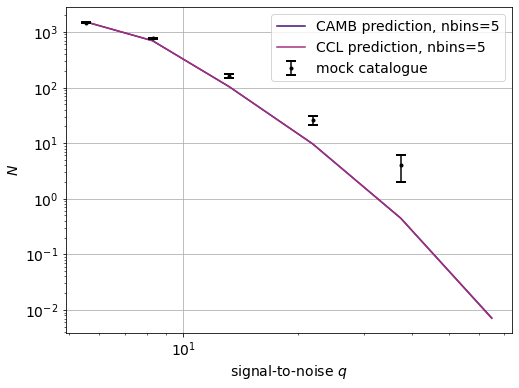

In [10]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

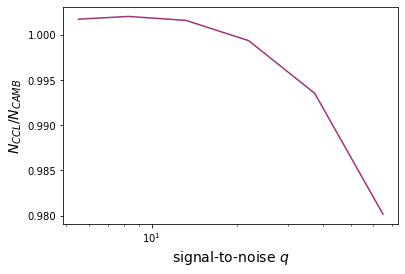

In [11]:
plt.semilogx(q, Nq_ccl/Nq, color=color_list[6])
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()